# Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
from sklearn.model_selection import train_test_split


# Load dataset

In [3]:
data = pd.read_csv('../../Datasets/NVDA.csv') 
data.head()


,Date,Open,High,Low,Close,Volume
0,2010-01-04,18.51,18.6200,18.11,18.49,20005100
1,2010-01-05,18.51,18.9600,18.42,18.76,18216200
2,2010-01-06,18.75,18.9200,18.57,18.88,16229200
3,2010-01-07,18.78,18.8600,18.37,18.51,13694800
4,2010-01-08,18.36,18.6821,18.25,18.55,11954200


# Data Preprocessing

In [4]:
# Reset index
data.reset_index(drop=True, inplace=True)

# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Fill NaN values in numeric columns with the mean of those columns
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

# Display the first few rows of the DataFrame
print(data.head())

         Date   Open     High    Low  Close    Volume
0  2010-01-04  18.51  18.6200  18.11  18.49  20005100
1  2010-01-05  18.51  18.9600  18.42  18.76  18216200
2  2010-01-06  18.75  18.9200  18.57  18.88  16229200
3  2010-01-07  18.78  18.8600  18.37  18.51  13694800
4  2010-01-08  18.36  18.6821  18.25  18.55  11954200


In [5]:
# Calculate moving average
ma_day = [5, 10, 20, 50]  # Common short-term and long-term windows
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Close'].rolling(window=ma).mean()

# Calculate Exponential moving average
for ma in ma_day:
    column_name = f"EMA for {ma} days"
    data[column_name] = data['Close'].ewm(span=ma, adjust=False).mean()

# Calculate RSI
def compute_RSI(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

data['RSI_14'] = compute_RSI(data)

# MACD
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2




            Date      Open      High      Low   Close    Volume  \
0     2010-01-04   18.5100   18.6200   18.110   18.49  20005100   
1     2010-01-05   18.5100   18.9600   18.420   18.76  18216200   
2     2010-01-06   18.7500   18.9200   18.570   18.88  16229200   
3     2010-01-07   18.7800   18.8600   18.370   18.51  13694800   
4     2010-01-08   18.3600   18.6821   18.250   18.55  11954200   
...          ...       ...       ...      ...     ...       ...   
2763  2020-12-23  530.2400  531.0000  520.200  520.37   4478569   
2764  2020-12-24  521.4900  525.3000  517.550  519.75   2447088   
2765  2020-12-28  522.5000  522.5000  510.527  516.00   5286655   
2766  2020-12-29  517.0000  522.9000  513.690  517.73   4259304   
2767  2020-12-30  519.6124  528.5500  515.870  525.83   5634929   

      MA for 5 days  MA for 10 days  MA for 20 days  MA for 50 days  \
0               NaN             NaN             NaN             NaN   
1               NaN             NaN             NaN  

,count,mean,std,min,25%,50%,75%,max
Open,2768.0,1.005494e+02,1.259453e+02,8.720000e+00,1.521000e+01,2.270000e+01,1.686550e+02,5.881500e+02
High,2768.0,1.021273e+02,1.279169e+02,9.050000e+00,1.542750e+01,2.292000e+01,1.714475e+02,5.890699e+02
Low,2768.0,9.884079e+01,1.236593e+02,8.650000e+00,1.501500e+01,2.236500e+01,1.665125e+02,5.607450e+02
Close,2768.0,1.005478e+02,1.258585e+02,8.882500e+00,1.522750e+01,2.266500e+01,1.687750e+02,5.824800e+02
Volume,2768.0,1.292474e+07,8.470079e+06,1.141128e+06,7.547889e+06,1.072494e+07,1.588003e+07,9.232320e+07
MA for 5 days,2764.0,1.003030e+02,1.253592e+02,9.125200e+00,1.519225e+01,2.259250e+01,1.677330e+02,5.628080e+02
MA for 10 days,2759.0,9.999292e+01,1.247402e+02,9.234600e+00,1.516475e+01,2.248600e+01,1.669625e+02,5.571820e+02
MA for 20 days,2749.0,9.936351e+01,1.234665e+02,9.395800e+00,1.523550e+01,2.234700e+01,1.670425e+02,5.473200e+02
MA for 50 days,2719.0,9.742960e+01,1.193587e+02,9.902820e+00,1.512507e+01,2.197510e+01,1.684270e+02,5.387958e+02
EMA for 5 days,2768.0,1.001837e+02,1.252781e+02,9.144259e+00,1.517984e+01,2.248851e+01,1.671305e+02,5.615555e+02


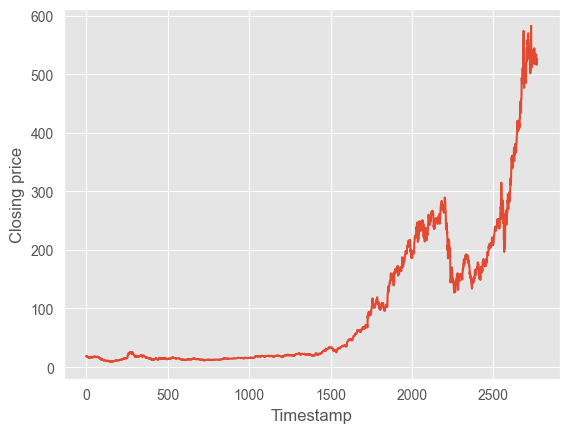

In [6]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [7]:
# Remove na values
data.dropna(inplace=True)
data.head(500)

,Date,Open,High,Low,Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,EMA for 5 days,EMA for 10 days,EMA for 20 days,EMA for 50 days,RSI_14,MACD
49,2010-03-16,17.15,17.86,17.14,17.755,16624700,17.389,17.1875,16.93125,17.0574,17.393401,17.228277,17.063097,17.180483,65.751634,0.137241
50,2010-03-17,17.86,18.34,17.86,18.100,16279200,17.491,17.3345,16.94425,17.0496,17.628934,17.386772,17.161850,17.216543,71.144279,0.200552
51,2010-03-18,18.13,18.13,17.30,17.460,18524100,17.545,17.4145,16.98375,17.0236,17.572623,17.400087,17.190245,17.226090,64.125561,0.196815
52,2010-03-19,17.72,17.77,17.03,17.250,14615300,17.545,17.4225,17.01725,16.9910,17.465082,17.372798,17.195936,17.227028,54.975124,0.174893
53,2010-03-22,17.03,17.60,17.03,17.530,10883400,17.619,17.4835,17.06325,16.9714,17.486721,17.401380,17.227752,17.238909,58.041958,0.178060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,2012-03-01,15.21,15.43,15.15,15.250,11248600,15.398,15.6945,15.83750,14.8944,15.388932,15.560213,15.553745,15.181346,31.448763,0.111164
545,2012-03-02,15.20,15.60,15.20,15.380,17101900,15.316,15.5875,15.83225,14.9389,15.385954,15.527447,15.537198,15.189136,39.921722,0.086502
546,2012-03-05,15.27,15.30,14.75,14.860,12871200,15.194,15.4885,15.78425,14.9581,15.210636,15.406093,15.472703,15.176229,27.127660,0.024712
547,2012-03-06,14.69,14.81,14.46,14.720,11785000,15.072,15.3680,15.73550,14.9781,15.047091,15.281349,15.401017,15.158337,23.519164,-0.035148


In [8]:
# adapted from founcation code, added improvements

feature_columns = [
    'Close',          
    'Low',            
    'High',           
    'Open',           
    'EMA for 5 days', 
    'MA for 5 days', 
    'RSI_14'          
]


X = []
Y = []
window_size = 15

# Iterating through the dataset to create inputs and targets
for i in range(1, len(df) - window_size - 1, 1):
    first_close = df.iloc[i, df.columns.get_loc('Close')]  # Normalize using "Close" price
    temp = []
    temp2 = []
    
    for j in range(window_size):
        # Normalize each feature in the feature_columns list
        normalized_features = []
        for feature in feature_columns:
            if feature == 'Close':
                # Normalize "Close" value
                normalized_value = (df.iloc[i + j, df.columns.get_loc(feature)] - first_close) / first_close
            else:
                normalized_value = df.iloc[i + j, df.columns.get_loc(feature)]
            normalized_features.append(normalized_value)
        
        # Append the normalized features 
        temp.append(normalized_features)
    
    # Calculate the target 
    target = (df.iloc[i + window_size, df.columns.get_loc('Close')] - first_close) / first_close
    temp2.append(target)
    
    # Append the input and target to X and Y
    X.append(np.array(temp))  
    Y.append(np.array(temp2).reshape(1, 1))

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Converting lists to numpy arrays
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

# Verify the shape of train_X
print("Shape of train_X before reshaping:", train_X.shape)

# Reshape the data for CNN models
train_X = train_X.reshape(train_X.shape[0], 1, train_X.shape[1], train_X.shape[2])  
test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1], test_X.shape[2])

# Printing the number of training and testing samples
print("Shape of train_X after reshaping:", train_X.shape)
print("Shape of test_X after reshaping:", test_X.shape)
print("Number of training samples:", len(train_X))
print("Number of testing samples:", len(test_X))

Shape of train_X before reshaping: (2161, 15, 7)
Shape of train_X after reshaping: (2161, 1, 15, 7)
Shape of test_X after reshaping: (541, 1, 15, 7)
Number of training samples: 2161
Number of testing samples: 541


In [9]:
# Check if there are any NaN values

print(np.isnan(train_X).any(), np.isnan(train_Y).any())
print(np.isinf(train_X).any(), np.isinf(train_Y).any())

False False
False False


# Load saved model

In [10]:
from keras.models import load_model

# load the model
model = load_model('improved_cnn_lstm_model.keras')

In [11]:
# make predictions
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp



17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


In [12]:
from scipy.signal import savgol_filter

def plot_predictions(test_label, predicted, title="Actual V Stock Price Prediction"):
    # Apply smoothing to both lines
    window_length = 5  # Must be odd
    polyorder = 1
    
    # Smooth both actual and predicted values
    test_label_smooth = savgol_filter(test_label.flatten(), window_length, polyorder)
    predicted_smooth = savgol_filter(predicted.flatten(), window_length, polyorder)
    
    plt.figure(figsize=(15, 6))
    
    # Plot smoothed lines
    plt.plot(test_label_smooth, label='Actual Price', color='red')
    plt.plot(predicted_smooth, label='Predicted Price', color='blue')
    
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

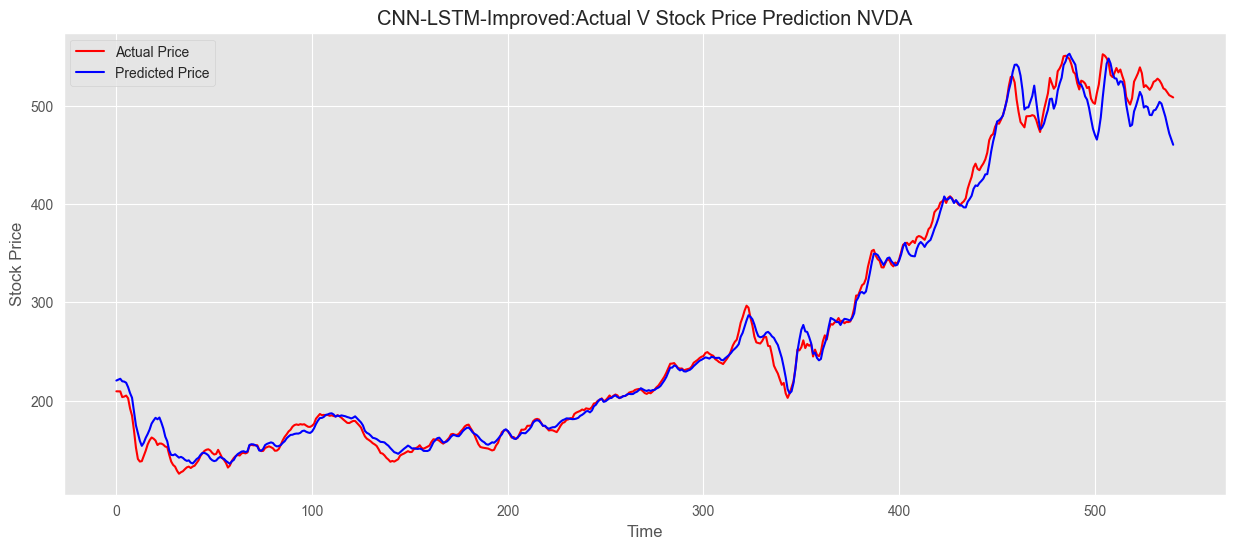

In [13]:
plot_predictions(test_label, predicted, "CNN-LSTM-Improved:Actual V Stock Price Prediction NVDA")

# Perform Evaluation

In [14]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate performance metrics
mse = mean_squared_error(test_label, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_label, predicted)
mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 234.55820569225207
Root Mean Squared Error (RMSE): 15.31529319641815
Mean Absolute Error (MAE): 10.101832125422971
Mean Absolute Percentage Error (MAPE): 3.81%


In [15]:
def save_metrics(test_label, predicted, model_name, stock_name):
    """
    Calculate metrics and save to CSV 
    """
    # Calculate metrics
    mse = mean_squared_error(test_label, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_label, predicted)
    mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100
    r2 = r2_score(test_label, predicted)
    
    # Round to 4 decimal places
    rmse = round(rmse, 4)
    mae = round(mae, 4)
    mape = round(mape, 4)
    r2 = round(r2, 4)
    mse = round(mse, 4)
    
    # Create metrics dictionary
    metrics = {
        'Model': [model_name],
        'Stock': [stock_name],
        'RMSE': [rmse],
        'MAE': [mae],
        'MAPE': [mape],
        'R2': [r2]
    }
    
    # Convert to DataFrame
    df_metrics = pd.DataFrame(metrics)
    
    # Save to CSV
    filename = f'metrics_{model_name}_{stock_name}.csv'
    df_metrics.to_csv(filename, index=False)
    
    # Print metrics
    print(f"\nMetrics for {model_name} on {stock_name}:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
    print(f"R² Score: {r2:.4f}")

In [16]:
# Save metrics to CSV
save_metrics(test_label, predicted, "CNN-LSTM-Improved", "NVDA")  

NameError: name 'r2_score' is not defined